In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [20]:
from sklearn.datasets import load_iris
iris = load_iris()

dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [21]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [22]:
df=df.drop(['sepal length (cm)','sepal width (cm)'],axis="columns") # for simplicity dropping them before clustering as per problem statement
df['target']=iris.target

In [23]:
df

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [24]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


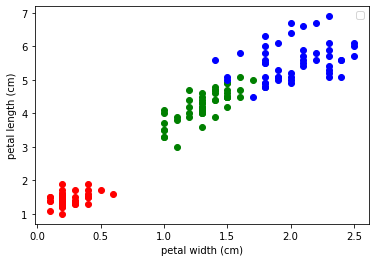

In [25]:
plt.scatter(df1['petal width (cm)'],df1['petal length (cm)'],color="green")
plt.scatter(df0['petal width (cm)'],df0['petal length (cm)'],color="red")
plt.scatter(df2['petal width (cm)'],df2['petal length (cm)'],color="blue")

plt.xlabel("petal width (cm)")
plt.ylabel("petal length (cm)")
plt.legend()

clearly there are scaling issue

In [26]:
scalar = MinMaxScaler()
scalar.fit(df[['petal width (cm)']])
df['petal width (cm)']=scalar.transform(df[['petal width (cm)']])
scalar.fit(df[['petal length (cm)']])
df['petal length (cm)']=scalar.transform(df[['petal length (cm)']])
df

,petal length (cm),petal width (cm),target
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,2
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,2


need to find k -> number of clusters its obvio in this case its 3

In [27]:
k_rng=range(1,10) # assumption its in bw 1-10
sse=[] # sum of sq err
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_) # this km.insertia_ gives see

In [28]:
sse

[28.368353219727197,
 5.176463590044368,
 1.7018746881920968,
 1.1588792731667126,
 0.8538617353912239,
 0.6806539059219305,
 0.565127345570398,
 0.4869986050264929,
 0.4156536127160733]

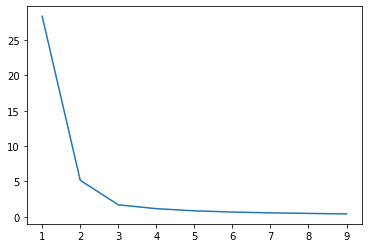

In [29]:
plt.plot(k_rng,sse)


clearly its k=3


In [30]:
km=KMeans(n_clusters=3)
km


KMeans(n_clusters=3)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


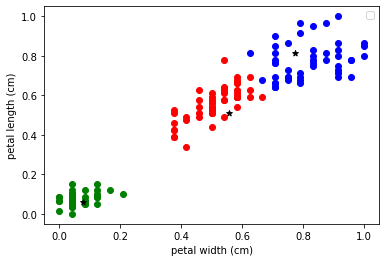

In [36]:
y_pred=km.fit_predict(df[['petal length (cm)','petal width (cm)']])
df['target']=y_pred
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]
plt.scatter(df1['petal width (cm)'],df1['petal length (cm)'],color="green")
plt.scatter(df0['petal width (cm)'],df0['petal length (cm)'],color="red")
plt.scatter(df2['petal width (cm)'],df2['petal length (cm)'],color="blue")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="black",marker="*")

plt.xlabel("petal width (cm)")
plt.ylabel("petal length (cm)")
plt.legend()